In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_colwidth', None)
pd_kifu_info = pd.read_pickle("../data/dataset_information/kifu_info.pickle")
pd_kifu_info.head()

,filename,move_len,toryo,rate_black,rate_white
0,/Users/JP26965/private/shogi_ai/data/kifu_csa/2017/wdoor+floodgate-300-10F+sg_test03a+Shocking_Blue_Incinerator+20171123113007.csa,151,True,3315.0,NaN
1,/Users/JP26965/private/shogi_ai/data/kifu_csa/2017/wdoor+floodgate-300-10F+yy0802_raspi3+Sunfish4-AWS07+20171021133003.csa,68,True,2874.0,2431.0
2,/Users/JP26965/private/shogi_ai/data/kifu_csa/2017/wdoor+floodgate-300-10F+Ganbaruby_tamore_4c+YssCNN_F128L12_a48+20171024040004.csa,74,True,NaN,1476.0
3,/Users/JP26965/private/shogi_ai/data/kifu_csa/2017/wdoor+floodgate-300-10F+ShogiNet_withE+test-N1000+20170525040003.csa,194,True,1638.0,2180.0
4,/Users/JP26965/private/shogi_ai/data/kifu_csa/2017/wdoor+floodgate-300-10F+Titanda_L+Ukamuse_SeoTsume_NB9_i5-3317U+20170414020001.csa,156,True,3584.0,3408.0


In [3]:
pd_kifu_info["high_quality"] = pd_kifu_info.apply(
    lambda x: (
        x["move_len"] > 50
        and x["toryo"]
        and x.get("rate_black", 0) >= 2500
        and x.get("rate_white", 0) >= 2500
    ),
    axis=1,
)

pd_kifu_info[pd_kifu_info["high_quality"]].head()

,filename,move_len,toryo,rate_black,rate_white,high_quality
4,/Users/JP26965/private/shogi_ai/data/kifu_csa/2017/wdoor+floodgate-300-10F+Titanda_L+Ukamuse_SeoTsume_NB9_i5-3317U+20170414020001.csa,156,True,3584.0,3408.0,True
6,/Users/JP26965/private/shogi_ai/data/kifu_csa/2017/wdoor+floodgate-300-10F+SILENT_MAJORITY_1.25_6950X+SM1.25_nb11_i7-3517U+20170505080002.csa,188,True,3671.0,3269.0,True
7,/Users/JP26965/private/shogi_ai/data/kifu_csa/2017/wdoor+floodgate-300-10F+Yss1000k+Heboshogi+20170920203011.csa,103,True,2578.0,3238.0,True
14,/Users/JP26965/private/shogi_ai/data/kifu_csa/2017/wdoor+floodgate-300-10F+furibisya_terzo+gpsfish_normal_1c+20170907213008.csa,164,True,3597.0,2800.0,True
19,/Users/JP26965/private/shogi_ai/data/kifu_csa/2017/wdoor+floodgate-300-10F+yaselmo_testeval_2c+gikou2_i5-560M+20170913040008.csa,96,True,3712.0,3409.0,True


In [4]:
pd_kifu_info[["move_len", "rate_black", "rate_white"]].describe()

,move_len,rate_black,rate_white
count,155386.000000,129929.000000,129986.000000
mean,117.519487,2761.133527,2759.983998
std,48.635395,628.681402,627.727382
min,1.000000,-4540.000000,-4540.000000
25%,90.000000,2347.000000,2346.000000
50%,116.000000,2805.000000,2800.000000
75%,145.000000,3214.000000,3213.000000
max,257.000000,9630.000000,9630.000000


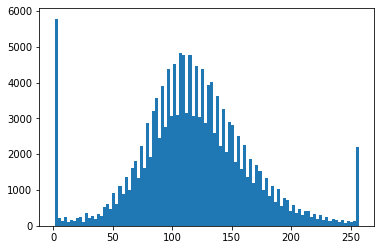

In [5]:
plt.hist(pd_kifu_info["move_len"], bins=100)
plt.show()

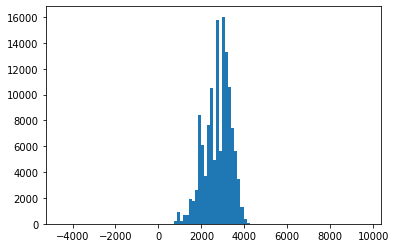

In [6]:
plt.hist(pd_kifu_info["rate_black"], bins=100)
plt.show()

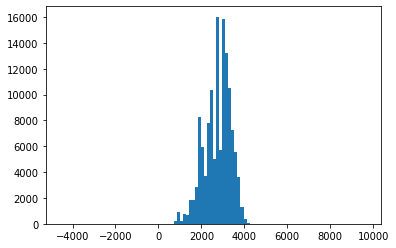

In [7]:
plt.hist(pd_kifu_info["rate_white"], bins=100)
plt.show()